# Objective 

#### Analyze the data and draw conclusions on the distribution and nature of crime in Montreal City. 

## Insights to Gather

1. What are the top 3 prevalent crimes or offenses committed in Montreal City?
2. What part of the day did most crime incidents occur?
3. Which top 5 police precincts (PDQ) got the most crime complaints?
4. Which are the top 3 PDQs that got the least crime complaints?
5. Which neighborhoods recorded the highest crime incidents and what are the crime types in these neighborhoods?
6. Which neighborhood has the most cases of murder?

In [52]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# importing csv and storing it under variable df
df = pd.read_csv('data/actes-criminels.csv')

# looking at ten random samples in the dataset
df.sample(n = 10, random_state = 42)

,Categorie,Category,Date,Time of Day,PDQ,x,y,Latitude,Longitude
239171,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-21,nuit,5.0,286738.781,5034640.500,-73.730911,45.451461
241143,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-13,soir,46.0,301170.719,5052541.000,-73.546533,45.612761
71477,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2017-04-08,soir,35.0,NaN,NaN,NaN,NaN
220515,Méfait,Mischief,2022-02-03,soir,26.0,296411.468,5039514.749,-73.607330,45.495505
145543,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2019-10-20,nuit,38.0,298718.852,5040797.622,-73.577823,45.507073
8442,Vol de véhicule à moteur,Theft of Motor Vehicle,2016-02-01,nuit,39.0,294232.206,5049929.965,-73.635438,45.589195
141468,Vols qualifiés,Robbery,2019-05-29,jour,23.0,301924.195,5046352.614,-73.536836,45.557079
130051,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2018-12-01,jour,38.0,297820.809,5042397.078,-73.589339,45.521457
126634,Introduction,Breaking & Entering,2019-09-15,jour,13.0,294577.750,5031274.500,-73.630621,45.421331
65022,Vols qualifiés,Robbery,2016-11-05,soir,21.0,299962.840,5041609.764,-73.561911,45.514391


In [53]:
# taking a look at the landscape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244117 entries, 0 to 244116
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Categorie    244117 non-null  object 
 1   Category     244117 non-null  object 
 2   Date         244117 non-null  object 
 3   Time of Day  244117 non-null  object 
 4   PDQ          244112 non-null  float64
 5   x            202724 non-null  float64
 6   y            202724 non-null  float64
 7   Latitude     202724 non-null  float64
 8   Longitude    202724 non-null  float64
dtypes: float64(5), object(4)
memory usage: 16.8+ MB


In [54]:
# searching for null values by column
df.isnull().sum()

Categorie          0
Category           0
Date               0
Time of Day        0
PDQ                5
x              41393
y              41393
Latitude       41393
Longitude      41393
dtype: int64

In [55]:
# getting a quick statistical overview of numerical values in dataset
# also rounding the decimals to the second decimal point
round(df.describe(),2)

,PDQ,x,y,Latitude,Longitude
count,244112.00,202724.00,202724.00,202724.00,202724.00
mean,26.32,295794.17,5043227.57,-73.62,45.53
std,14.03,6085.98,6070.39,0.08,0.05
min,1.00,268109.61,5029291.47,-73.97,45.40
25%,15.00,293900.98,5039087.60,-73.64,45.49
50%,26.00,297338.25,5042878.08,-73.60,45.53
75%,39.00,299665.90,5047188.21,-73.57,45.56
max,55.00,306389.86,5062496.46,-73.48,45.70


## What are the Top 3 more prevalent crimes or offenses in Montreal city?

### Steps to get there

#### There are a couple of ways to build the table

+ Option 1: Create a table by calling on the Category column directly and using the .value_counts function
### OR
+ Option 2: Create a table grouped by the Category column and using the .count function 


### Next Steps

1. Now that we have the counts, it would be helpful to know what the population of Montreal City is (Google: 1,780,000)
2. Calculate each respective crime for every 100,000 MTL residents --- > (Crime Count/ 1,780,000 Million) * 100,000
3. The results aims to provide better context around the crime (Ie. For every 100,000 residents there will be 4,061 Thefts From / To Motor Vehicle)
4. Build a visual to display the results

In [56]:
# building a table by calling on the Category column directly and applying value_counts function
# renaming both columns
dt = df['Category'].value_counts().reset_index().rename({"index" : "Crime", "Category" : "Crime Count"}, axis = 1)
dt

,Crime,Crime Count
0,Theft From / To Motor Vehicle,72291
1,Breaking & Entering,61107
2,Mischief,53720
3,Theft of Motor Vehicle,43135
4,Robbery,13639
5,Murder Resulting in Death,225


In [57]:
# creating a new column that will divide the crime count by the total population * 100000 to calculate the count by 100,000 residents
dt['per/100000 people'] = round((dt['Crime Count'] / 1_780_000) * 100000, 0).astype(int)

# ranking the crimes by the count descending the highest count at the top
dt['rank'] = dt['Crime Count'].rank(method = 'dense', ascending = False).astype(int)

# looking at the table to ensure the data adds up
dt

,Crime,Crime Count,per/100000,rank
0,Theft From / To Motor Vehicle,72291,4061,1
1,Breaking & Entering,61107,3433,2
2,Mischief,53720,3018,3
3,Theft of Motor Vehicle,43135,2423,4
4,Robbery,13639,766,5
5,Murder Resulting in Death,225,13,6


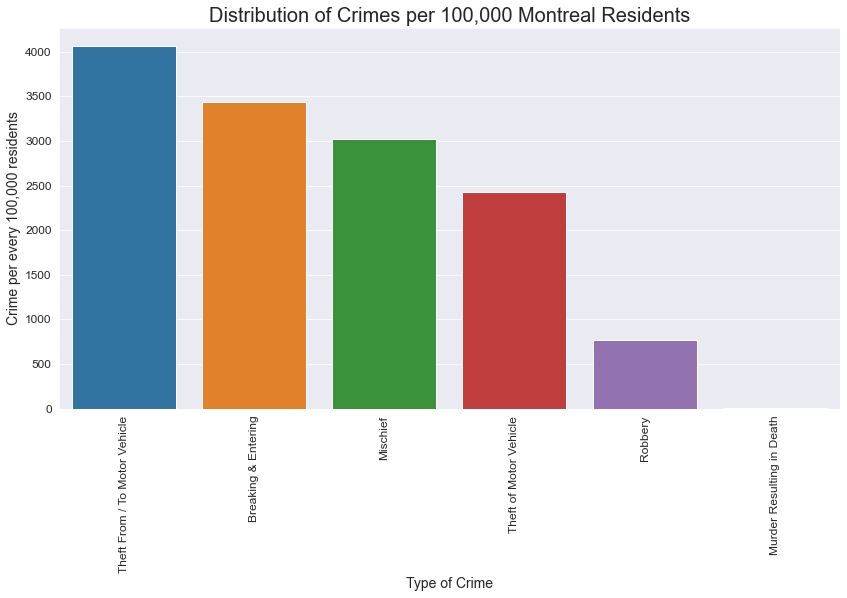

In [58]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will likely use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# creating a barplot using seaborn and passing the Crime and count per/100000 residents as the data source
sns.barplot(x = 'Crime', y = 'per/100000 people', data = dt, ax = ax)

# adding a title to the chart
plt.title('Distribution of Crimes per 100,000 Montreal Residents', fontdict = {'fontsize' : fontsize})

# renaming the y-axis and increasing the font size
plt.ylabel('Crime per every 100,000 residents', fontdict = {'fontsize' : axfont})

# renaming the x-axis and increasing the font sise
plt.xlabel('Type of Crime',  fontdict = {'fontsize' : axfont})

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# rotating the axis labels to 90 degrees
plt.xticks(rotation = 90)

# displaying chart created
plt.show();

In [59]:
# filtering the table to see which are the three most prevalent crimes 
# since we used a rank function, specifically for this scenario all that needs to be done is filter by rank where it is <= 3
top_three_crimes =  dt[dt['rank'] <= 3]

top_three_crimes

,Crime,Crime Count,per/100000,rank
0,Theft From / To Motor Vehicle,72291,4061,1
1,Breaking & Entering,61107,3433,2
2,Mischief,53720,3018,3


In [60]:
# calculating the total sum of crimes per 100,000 MTL residents
total_crime_count = top_three_crimes['per/100000 people'].sum()

crimes = top_three_crimes

# printing out statement
print(f"The top three most prevalent crimes in Montreal make up for {total_crime_count} incidents for every 100,000 residents in Montreal City.")

The top three most prevalent crimes in Montreal make up for 10512 incidents for every 100,000 residents in Montreal City.


### Key Takeways

#### Objective: 3 Most Prevalent Crimes

1. Theft From / to Motor Vehicle
2. Breaking & Entering
3. Mischief

+ Making up for 10,512 Incidents per 100,000 residents in the City

### Question 2: What part of the day did most incidents occur?

#### Next Steps

+ Build a table grouped by the time of day, counting the total number of incidents per time of day
+ Create a visual to display findings

In [61]:
# creating a table grouped by the time of day and the count distribution for each category
# renaming both columns
time_of_day = df['Time of Day'].value_counts().reset_index().rename({"index" : "Time of Day" , "Time of Day" : "Incident Count"}, axis = 1)
time_of_day

,Time of Day,Incident Count
0,jour,124382
1,soir,81612
2,nuit,38123


### Making a Change

+ Add a new column called Time of Day but in English for clarity


In [62]:
# creating a dictionary to map French time of day labels to English labels
day_dict = {"jour" : "day", "soir" : "evening", "nuit" : "night"}

# replace French time of day labels in the 'Time of Day' column with English labels
time_of_day['Time of Day (ENG)'] = time_of_day['Time of Day'].replace(day_dict)

# printing dataframe to ensure mapping worked correctly
time_of_day

,Time of Day,Incident Count,Time of Day (ENG)
0,jour,124382,day
1,soir,81612,evening
2,nuit,38123,night


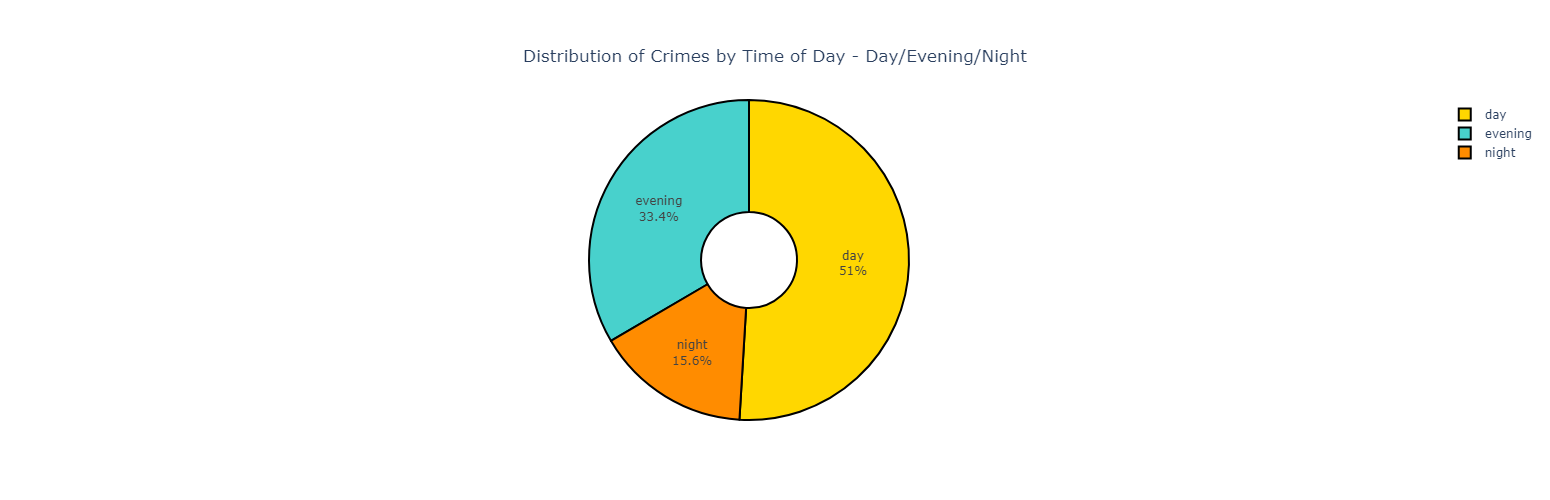

In [63]:
# importing plotly to create a pie chart visual
import plotly.express as px

# define a list of colours for the pie chart
colors = ['gold', 'mediumturquoise', 'darkorange']

# creating a pie chart using plotly express with time_of_day as the data source
fig = px.pie(data_frame = time_of_day, # data source
             values = 'Incident Count', # count by time of day 
             names = 'Time of Day (ENG)', # passing the English labels as the label 
             title = 'Distribution of Crimes by Time of Day - Day/Evening/Night', # setting the title for the pie chart
             width = 700, # width of the chart in pixels
             height = 500, # height of the chart in pixels
             hole = .3) # size of the donut hole

# aligning title to the centre
fig.update_layout(title = {'y' : 0.9, 'x' : 0.5})

fig.update_traces(textposition = 'inside', # position of the text label within the pie chart
                  textinfo = 'percent+label', # format of the text labels in the chart
                  textfont_size=12, # font size of the tect labels in the chart
                  marker=dict(colors=colors, line=dict(color='#000000', width=2))) # properties of the lines separating the sections

# displaying styled chart
fig.show();

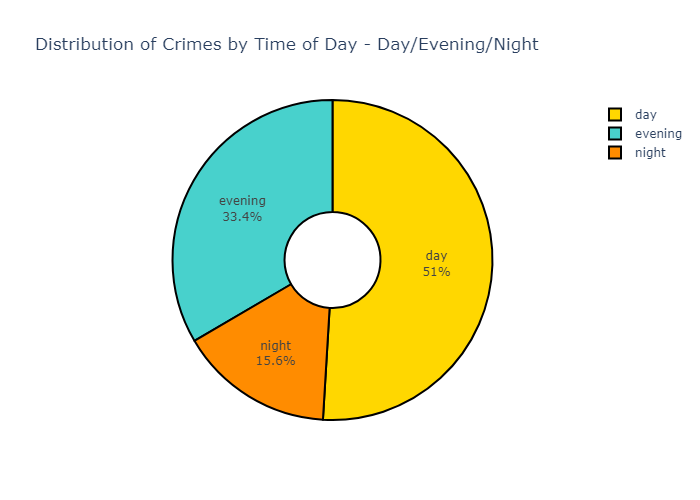

### Key Takeways

1. More than half of the crimes occur betweeen the times of 8AM to 4PM
2. 33.4% of crimes occur between 4:01 PM to Midnight
3. Lastly, 15.6% of crime occurred between 00:01 t0 8:00 AM

### Questions to consider:

+ At what time of day to the more severe crimes (Ie. Murder, or potential harm to innocent people) occurr?
+ Are there crime hot spots where the likelihood of crime is higher than in other areas?

### Question 3: Which Police Precincts (PDQ) got the most complaints?

#### Next Steps

+ Build a table grouped by the Police Precinct and the total count of crimes reported
+ Use the rank function and filter out by the Top 5 ranked Precinct based on crimes reported

In [64]:
# displaying a random sample of the dataset
df.sample(n = 10, random_state = 42)

,Categorie,Category,Date,Time of Day,PDQ,x,y,Latitude,Longitude
239171,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-21,nuit,5.0,286738.781,5034640.500,-73.730911,45.451461
241143,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-13,soir,46.0,301170.719,5052541.000,-73.546533,45.612761
71477,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2017-04-08,soir,35.0,NaN,NaN,NaN,NaN
220515,Méfait,Mischief,2022-02-03,soir,26.0,296411.468,5039514.749,-73.607330,45.495505
145543,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2019-10-20,nuit,38.0,298718.852,5040797.622,-73.577823,45.507073
8442,Vol de véhicule à moteur,Theft of Motor Vehicle,2016-02-01,nuit,39.0,294232.206,5049929.965,-73.635438,45.589195
141468,Vols qualifiés,Robbery,2019-05-29,jour,23.0,301924.195,5046352.614,-73.536836,45.557079
130051,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2018-12-01,jour,38.0,297820.809,5042397.078,-73.589339,45.521457
126634,Introduction,Breaking & Entering,2019-09-15,jour,13.0,294577.750,5031274.500,-73.630621,45.421331
65022,Vols qualifiés,Robbery,2016-11-05,soir,21.0,299962.840,5041609.764,-73.561911,45.514391


In [65]:
# creating a table groupeed by 'PDQ' column, count the number of occurrences of each value in the 'Time of Day' column, reset the index, and rename the 'Time of Day' column to '# of Crime Complaints'
# sorting the dataframe by crime complaints descending 
top_pdqs = df.groupby('PDQ')['Time of Day'].count().reset_index().rename({"Time of Day" : "Crime Complaints"}, axis = 1).sort_values(by = 'Crime Complaints', ascending = False)

# calculating % of total complaints per precinct
top_pdqs['perc of total'] = round(top_pdqs['Crime Complaints'] / top_pdqs['Crime Complaints'].sum() * 100, 2)

# adding a new column called complaints_rank, which is the rank of the PDQ based on the crime complaints received and converting the data type to integer
# The closer you are to 1, the higher amount of complaints received
top_pdqs['complaints_rank'] = top_pdqs['Crime Complaints'].rank(method = 'dense', ascending = False).astype(int)

# converting PDQ into an integer from a float
top_pdqs['PDQ'] = top_pdqs['PDQ'].astype(int)

# calculating the total number of crimes per 100,000 residents in MTL. googled the population
total_complaints = round((top_pdqs['Crime Complaints'].sum() / 1_780_000) * 100000, 0)

# printing out statement to understand total # of crime complaints
print(f"The total # of Crime Complaints in Montreal City is {total_complaints} per 100,000 residents.")

# printing out table
top_pdqs

The total # of Crime Complaints in Montreal City is 13714.0 per 100,000 residents.


,PDQ,CrimeComplaints,perc of total,complaints_rank
24,38,17265,7.07,1
14,21,14326,5.87,2
13,20,13593,5.57,3
30,48,11795,4.83,4
25,39,11149,4.57,5
4,7,11072,4.54,6
18,26,10460,4.28,7
27,44,9883,4.05,8
16,23,9505,3.89,9
11,15,9264,3.79,10


## Crime Complaints Table Built

### Next Steps

+ Filter for the Top 5 Precincts that received the most complaints by calling on the 'complaints_rank' column directly
+ Filter for the rank being less or equal to 5, which will provide the answer for the Top 5 Precincts that receive the most crime complaints

### After

+ What about the Top 3 Police Precincts that received the least crime complaints?

In [66]:
# filtering the table for the top 5 ranked police precincts in terms of crime complaints
top_5_crimes = top_pdqs[top_pdqs['complaints_rank'] <= 5]

# calculating total % of crime complaints 
perc_of_crime_total = top_5_crimes['perc of total'].sum()

# displaying the table
top_5_crimes

,PDQ,CrimeComplaints,perc of total,complaints_rank
24,38,17265,7.07,1
14,21,14326,5.87,2
13,20,13593,5.57,3
30,48,11795,4.83,4
25,39,11149,4.57,5


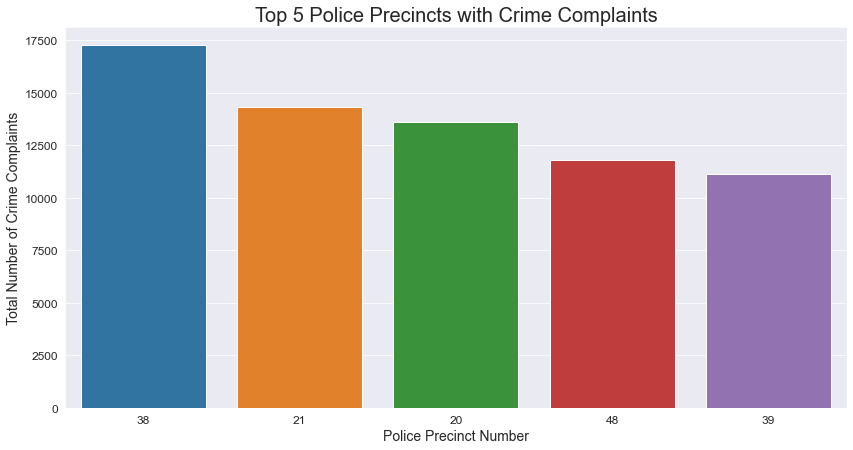

In [67]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# using seaborn library to create a barplot of the number of crime complaints for the top 5 police precincts
sns.barplot(x = 'PDQ', y = 'Crime Complaints', data = top_5_crimes, order = top_5_crimes.sort_values(by = 'Crime Complaints', ascending = False).PDQ, ax = ax)

# adding a title to the plot
plt.title('Top 5 Police Precincts with Crime Complaints', fontdict = {'fontsize' : fontsize})

# adding a label to the x-axis
plt.xlabel('Police Precinct Number', fontdict = {'fontsize' : axfont})

# adding a label to the y-axis
plt.ylabel('Total Number of Crime Complaints', fontdict = {'fontsize' : axfont})

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# displaying the plot
plt.show();

### Question 4: Which Police Precincts (PDQ) got the least complaints?

#### Next Steps

+ Sort the top_pdqs table by rank descending, which will bring the Precincts that received the least complaints first
+ Filter the Top 3 Precincts
+ This will give the answer on the Top 3 Precincts with the least complaints

In [68]:
# sorting the top_pdqs table by rank descending
top_pdqs = top_pdqs.sort_values(by = 'complaints_rank', ascending = False)

# creating a new table with the least complaints 
bottom_3_crimes = top_pdqs[top_pdqs['complaints_rank'] >= 32]

# displaying dataframe
bottom_3_crimes

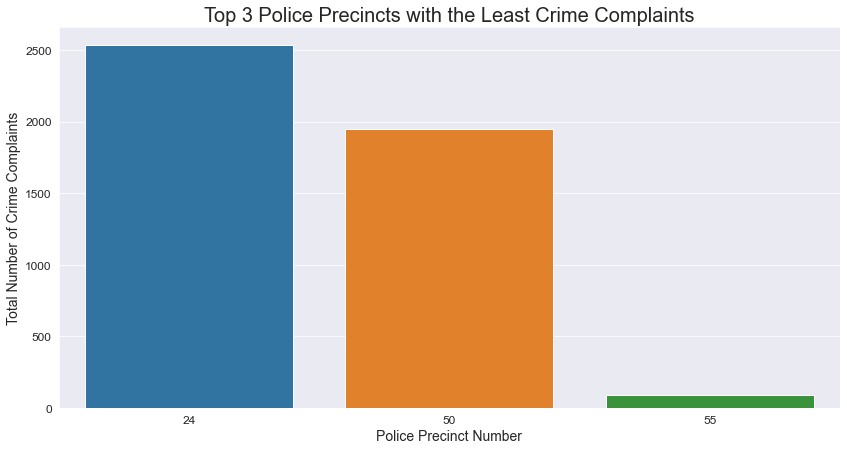

In [69]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# using seaborn library to create a barplot of the number of crime complaints for the top 5 police precincts
sns.barplot(x = 'PDQ', y = 'CrimeComplaints', data = bottom_3_crimes, ax = ax)

# adding a title to the plot
plt.title('Top 3 Police Precincts with the Least Crime Complaints', fontdict = {'fontsize' : fontsize})

# adding a label to the x-axis
plt.xlabel('Police Precinct Number', fontdict = {'fontsize' : axfont})

# adding a label to the y-axis
plt.ylabel('Total Number of Crime Complaints', fontdict = {'fontsize' : axfont})

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# displaying the plot
plt.show();

### Question 5: Which neighborhoods recorded the highest crime incidents and what are the crime types in these neighborhoods?

#### Approach

+ Create a new table counting crimes grouped by the Police Precinct
+ Create a pivot table, counting the crimes by Category grouped by PDQ
+ Merge both data sets using the .merge() functions and create a master table
+ Filter for the three highest Precincts with crime and their distribution of crimes

In [70]:
crimes_by_pdq = df.groupby('PDQ')['Date'].count().reset_index().rename({"Date" : "Crime Count"}, axis = 1).sort_values(by = 'PDQ', ascending = True)

crimes_by_pdq['PDQ'] = crimes_by_pdq['PDQ'].astype(int) 

crimes_by_pdq.sample(n = 10, random_state = 42)

,PDQ,Crime Count
15,22,7419
19,27,8952
27,44,9883
26,42,9219
8,11,3890
24,38,17265
21,31,7429
12,16,5962
32,50,1950
9,12,5079


In [71]:
crime_pivot = pd.pivot_table(df, index = 'PDQ', columns = 'Category', values = 'Date', aggfunc = 'count').reset_index().fillna(0).astype(int)

crime_pivot.sample(n = 10, random_state = 42)

Category,PDQ,Breaking & Entering,Mischief,Murder Resulting in Death,Robbery,Theft From / To Motor Vehicle,Theft of Motor Vehicle
15,22,2413,1718,7,580,1951,750
19,27,2283,1771,9,436,2424,2029
27,44,2875,1957,5,484,2784,1778
26,42,1748,1582,9,426,2932,2522
8,11,1018,1285,4,330,813,440
24,38,6428,3923,13,908,4265,1728
21,31,2117,1385,4,381,2119,1423
12,16,1799,1497,6,323,1681,656
32,50,97,1492,0,355,6,0
9,12,1308,1332,7,416,1561,455


In [72]:
crime_final_table = pd.merge(crimes_by_pdq, crime_pivot, how = 'left', on = 'PDQ')

crime_final_table['rank'] = crime_final_table['Crime Count'].rank(method = 'dense', ascending = False).astype(int)

crime_final_table = crime_final_table.sort_values(by = 'rank', ascending = True)

crime_final_table

,PDQ,Crime Count,Breaking & Entering,Mischief,Murder Resulting in Death,Robbery,Theft From / To Motor Vehicle,Theft of Motor Vehicle,rank
24,38,17265,6428,3923,13,908,4265,1728,1
14,21,14326,2299,3047,14,1083,6840,1043,2
13,20,13593,1822,2724,11,576,7602,858,3
30,48,11795,2803,2511,10,745,3148,2578,4
25,39,11149,2584,2324,15,710,2552,2964,5
4,7,11072,2288,1851,5,454,3020,3454,6
18,26,10460,2910,2351,8,662,2541,1988,7
27,44,9883,2875,1957,5,484,2784,1778,8
16,23,9505,3209,2233,7,579,2396,1081,9
11,15,9264,2774,2291,9,545,2554,1091,10


## Important to know

#### There are over 40,000 null values in 4 columns

+ There are almost 41,400 crimes without a latitude and longitude
+ Considering null values make up 17% of the dataset, the question now becomes: how to deal with them?
+ Are there specific PDQ's with higher counts of null values?


### What should be done with the null values

+ The danger is using an average or a median here, is that it is placing a crime in an area where it may not have actually happened
+ Due to the nature of the analysis, and the impact it can have on police precincts and potential resource allocation, it is best to move filter the blanks
+ Questions coming to mind:
+ Is the distribution of null values even across all precincts?
+ Or are there some precincts that have a much higher number of missing Latitude and Longitude coordinates

## Troubleshooting

#### We know the data came with the null values already, therefore..

+ Go back to the query that built this table and look for the root cause there first
+ Was it an outer join? Should it have been a left join?
+ Was the right table called?
+ Are there specific types of crime that don't have Latitude and Longitude?
+ Is the distribution of null values amongst precincts even? 
+ Or are there precincts with a much higher number of null values?


In [73]:
df.isnull().sum()

Categorie          0
Category           0
Date               0
Time of Day        0
PDQ                5
x              41393
y              41393
Latitude       41393
Longitude      41393
dtype: int64

In [74]:
# storing the calculating in a variable for print statement
perc_null = round(df['Latitude'].isnull().sum() / len(df) * 100,2)

# printing out statement outlining the % of null values in the Latitude and longitude fields 
print(f"The percentage of null values for Latitude and Longitude is {perc_null}%")

The percentage of null values for Latitude and Longitude is 16.96%


## Diving deeper 

+ Since the table below shows there are some precincts with a much higher counts of nulls than others, let's calculate the % of nulls per precinct
+ Build a table grouped by PDQ, and count the number of null values 
+ This can be done by filtering where the hex_id == 0, since there was no Latitude or Longitude to id
+ Build a table counting all hex_id instances, and calculate the % of nulls per PDQ

### What to do after

+ It may be worth calculating the % of nulls across all precincts, to understand who is above average
+ Once the findings are clear, and all troubleshooting has taken place, the next step is to ask for a better understanding as to why these happen

In [75]:
df[['x', 'y']] = df[['x', 'y']].fillna(0).astype(int)

# understanding how many null values there are, particularly in latitude and longitude
df.isnull().sum()

Categorie          0
Category           0
Date               0
Time of Day        0
PDQ                5
x                  0
y                  0
Latitude       41393
Longitude      41393
dtype: int64

In [76]:
# filtering out the columns where hex = 0, which occurs when the Latitude and Longitude are missing
nulls = df[df['x'] == 0]

# from that null table, grouping the data by police precinct and counting the total number of missing values by descending order
pdq_nulls = nulls.groupby('PDQ')['Date'].count().reset_index().rename({"Date" : "null count"}, axis = 1).sort_values(by = 'null count', ascending = False)

# converting the PDQ column from float to integer
pdq_nulls['PDQ'] = pdq_nulls['PDQ'].astype(int)

# displaying the table to understand the distribution amongst police precincts 
pdq_nulls

,PDQ,null count
13,20,5344
14,21,4994
24,38,2880
18,26,1838
25,39,1799
30,48,1712
27,44,1652
11,15,1589
15,22,1580
16,23,1432


### Null values, now what?

+ Build a table called total crimes which will be the entire data set grouped by precinct and counting the total number of crimes reported
+ Merge the nulls table on the PDQ (Police Precinct)
+ Calculate the total % of nulls per Police Precinct and store it in a new column

### Worth exploring further..

+ Calculate the average and median percentage of null values
+ Since there seem to be outliers in both directions, the distribution could be positive or negative
+ Depending on the outcome, the median may be a better option

In [77]:
# creating a table grouping all reported crimes by precinct
total_crimes = df.groupby('PDQ').agg({"Date" : "count", "Latitude" : "mean", "Longitude" : "mean"}).reset_index().rename({"Date" : "total crimes"}, axis = 1)

# converting the PDQ column from float to integer
total_crimes['PDQ'] = total_crimes['PDQ'].astype(int) 

# merging the total crimes table with the nulls on the Police Precinct number which is the unique identifier
total_crimes = pd.merge(total_crimes, pdq_nulls, how = 'left', on = 'PDQ')

# there are 2 NaNs in the null count column 
# filling in the NaN values with 0 on the null count column
total_crimes['null count'] = total_crimes['null count'].fillna(0)

# converting the null count column from float to integer
total_crimes['null count'] = total_crimes['null count'].astype(int)

# calculating the percntage of null values for every precinct and storing it in a new column and rounding it to the 2 nearest decimal
total_crimes['perc null'] = round(total_crimes['null count'] / total_crimes['total crimes'] * 100, 2)

# sorting the data by percentage of null values descending
# in other words, the precincts with the highest percentage of null values missing at the top
total_crimes = total_crimes.sort_values(by = 'perc null', ascending = False)

# displaying the table to ensure the descending order worked
total_crimes

,PDQ,total crimes,Latitude,Longitude,null count,perc null
17,24,2532,-73.615488,45.517698,1270,50.16
13,20,13593,-73.572077,45.499950,5344,39.31
14,21,14326,-73.558638,45.510137,4994,34.86
15,22,7419,-73.555237,45.526484,1580,21.30
20,30,7091,-73.611172,45.566858,1301,18.35
9,12,5079,-73.588321,45.488707,927,18.25
18,26,10460,-73.630807,45.499982,1838,17.57
11,15,9264,-73.581379,45.471730,1589,17.15
27,44,9883,-73.573274,45.557073,1652,16.72
21,31,7429,-73.620429,45.543759,1241,16.70


In [78]:
# calculating the median percentage of null values per precinct
median_null = round(total_crimes['perc null'].median(), 2)

# calculating the mean percentage of null values per precinct
avg_null = round(total_crimes['perc null'].mean(), 2)

# printing out a statement with both the median and mean to understand the distribution
print(f"The median for missing Latitude and Longitude coordinates is {median_null}. Meanwhile the mean is {avg_null}")

The median for missing Latitude and Longitude coordinates is 14.16. Meanwhile the mean is 14.99


In [79]:
# creating a function to label the precinct as below, average, or above average based on the precincts average missing coordinates
# based on the precincts average vs. the average for all precincts and label - above average if it's higher, below average if it's lower or average if it's average
def label_pdq(nulls):
    if nulls > avg_null:
        return 'Above Average'
    elif nulls < avg_null:
        return 'Below Average'
    else:
        'Average'

# applying function on perc null column and storing the label in a new column called null label    
total_crimes['PDQ null label'] = total_crimes['perc null'].apply(label_pdq)

total_crimes = total_crimes.sort_values(by = 'total crimes', ascending = False)

total_crimes

,PDQ,total crimes,Latitude,Longitude,null count,perc null,PDQ null label
24,38,17265,-73.579009,45.522652,2880,16.68,Above Average
14,21,14326,-73.558638,45.510137,4994,34.86,Above Average
13,20,13593,-73.572077,45.499950,5344,39.31,Above Average
30,48,11795,-73.532491,45.590783,1712,14.51,Below Average
25,39,11149,-73.628967,45.601432,1799,16.14,Above Average
4,7,11072,-73.695217,45.507144,1073,9.69,Below Average
18,26,10460,-73.630807,45.499982,1838,17.57,Above Average
27,44,9883,-73.573274,45.557073,1652,16.72,Above Average
16,23,9505,-73.542581,45.549424,1432,15.07,Above Average
11,15,9264,-73.581379,45.471730,1589,17.15,Above Average


In [80]:
# creating a table grouped by the label and counting number of precincts
pdq_labels = total_crimes.groupby('PDQ null label')['null count'].count().reset_index().rename({"null count" : "count"}, axis = 1)

# displaying the table to see the results
pdq_labels

,PDQ null label,count
0,Above Average,16
1,Below Average,18


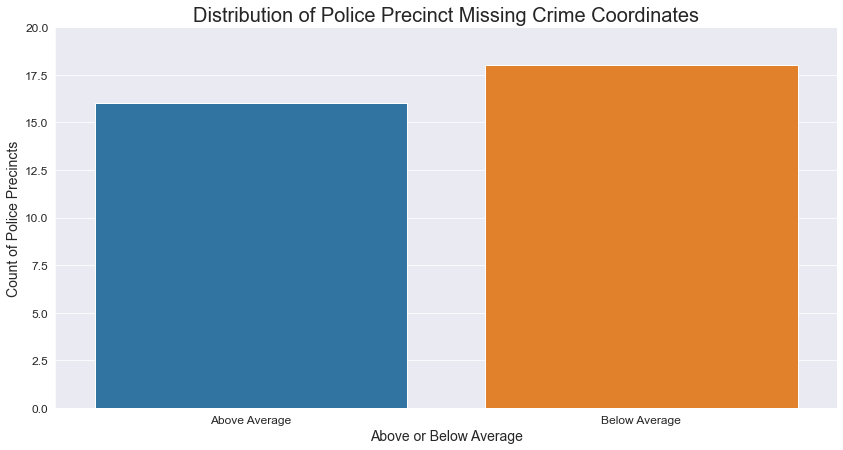

In [81]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# using seaborn library to create a barplot of the number of crime complaints for the top 5 police precincts
sns.barplot(x = 'PDQ null label', y = 'count', data = pdq_labels, ax = ax)

# adding a title to the plot
plt.title('Distribution of Police Precinct Missing Crime Coordinates', fontdict = {'fontsize' : fontsize})

# adding a label to the x-axis
plt.xlabel('Above or Below Average', fontdict = {'fontsize' : axfont})

# adding a label to the y-axis
plt.ylabel('Count of Police Precincts', fontdict = {'fontsize' : axfont})

# updating the range on the y-axis to 20
plt.ylim(0, 20)

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# displaying the plot
plt.show();

In [82]:
df.sample(n = 10, random_state = 42)

,Categorie,Category,Date,Time of Day,PDQ,x,y,Latitude,Longitude
239171,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-21,nuit,5.0,286738,5034640,-73.730911,45.451461
241143,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-13,soir,46.0,301170,5052541,-73.546533,45.612761
71477,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2017-04-08,soir,35.0,0,0,NaN,NaN
220515,Méfait,Mischief,2022-02-03,soir,26.0,296411,5039514,-73.607330,45.495505
145543,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2019-10-20,nuit,38.0,298718,5040797,-73.577823,45.507073
8442,Vol de véhicule à moteur,Theft of Motor Vehicle,2016-02-01,nuit,39.0,294232,5049929,-73.635438,45.589195
141468,Vols qualifiés,Robbery,2019-05-29,jour,23.0,301924,5046352,-73.536836,45.557079
130051,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2018-12-01,jour,38.0,297820,5042397,-73.589339,45.521457
126634,Introduction,Breaking & Entering,2019-09-15,jour,13.0,294577,5031274,-73.630621,45.421331
65022,Vols qualifiés,Robbery,2016-11-05,soir,21.0,299962,5041609,-73.561911,45.514391


In [83]:
map_df = df[df['x'] > 0]

import folium
from folium.plugins import HeatMap

m = folium.Map(location = [map_df['Longitude'].mean(), map_df['Latitude'].mean()], zoom_start = 11, tiles = 'cartodbpositron')

crime_data =  list(map(list, zip(total_crimes['Longitude'], total_crimes['Latitude'], total_crimes['total crimes'])))
                                 
HeatMap(crime_data,gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 1: 'red'}, 
                min_opacity=0.05, 
                max_opacity=0.9, 
                radius=25,
                use_local_extrema=False).add_to(m)

m

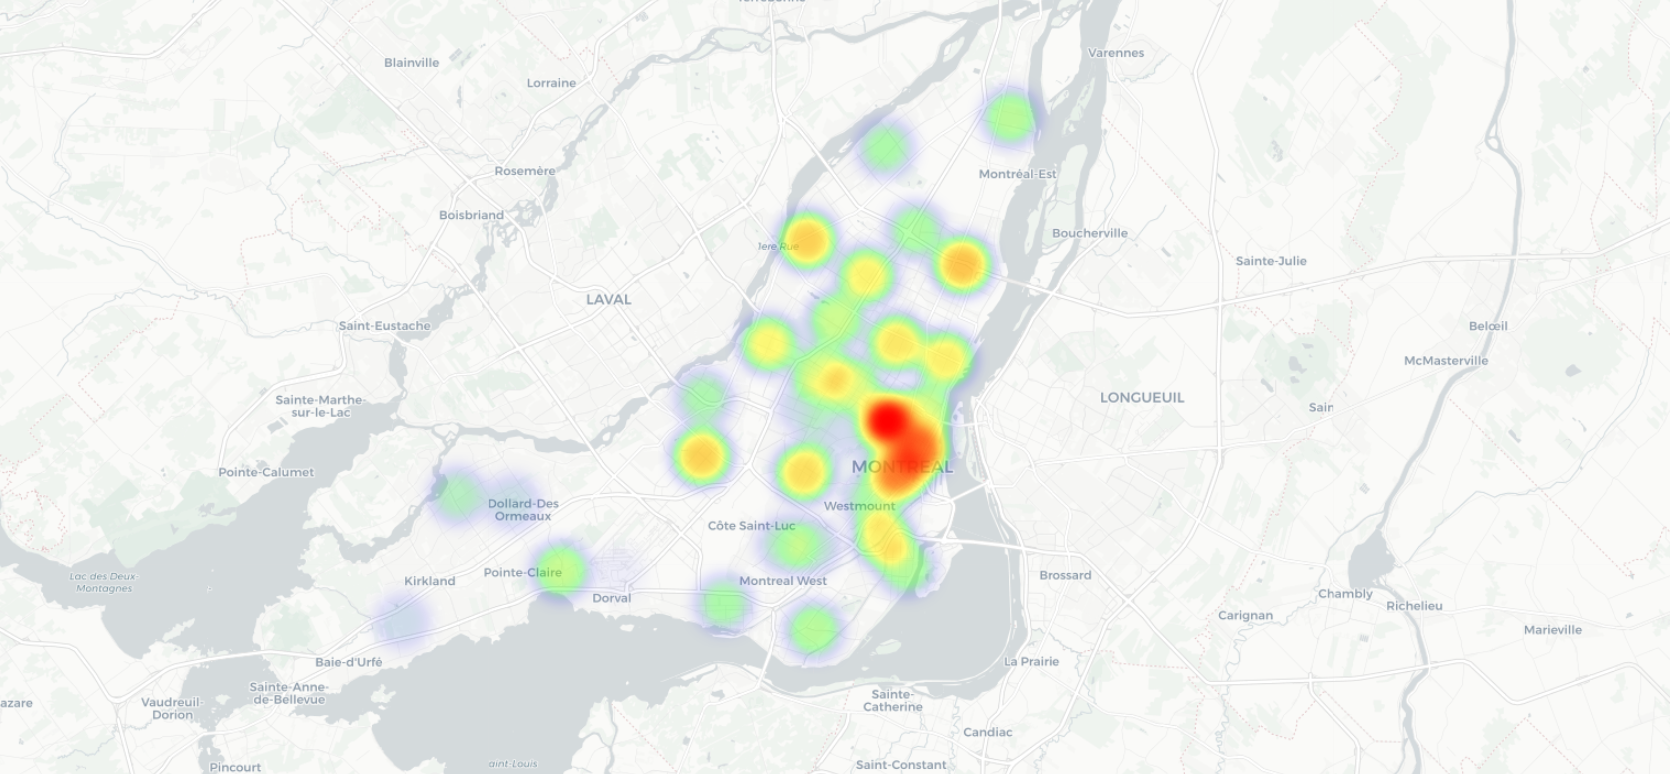